In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("emails.csv")

In [5]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [6]:
df.shape

(5728, 2)

In [7]:
df.sample(5)

,text,spam
2698,"Subject: receipts from visit dear vince , th...",0
1393,Subject: dec 2 super saturday friday and satur...,0
3965,Subject: candidate vince : here is the resum...,0
2562,"Subject: re : course instructor clare , i re...",0
3573,Subject: telephone interview with the enron re...,0


In [8]:
# 1. Data cleaning
# 2 .EDA
# 3 Text Preprocessing
# 4 Model building
# 5 Evaluation
# 6 Improvement
# 7 Webssite 
# 8 Deploy

## 1. Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [10]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [11]:
# checkinf for missing values
df.isnull().sum()

text    0
spam    0
dtype: int64

In [12]:
# for duplicates
df.duplicated().sum()

33

In [13]:
# remore duplicated
df = df.drop_duplicates(keep="first")

In [14]:
df.shape

(5695, 2)

In [15]:
df.duplicated().sum()

0

In [16]:
df.rename(columns={'spam': 'target'}, inplace = True)

C:\Users\JAGADISH\AppData\Local\Temp\ipykernel_9492\1388767076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'spam': 'target'}, inplace = True)


In [17]:
df.loc[:, 'text'] = df['text'].str.replace("Subject:", "", regex=False).str.strip()

## 2. EDA

In [18]:
df.sample(5)

,text,target
4377,re : private firm schedule thanks for the sch...,0
337,"also available levitra , cialis , and viagra ....",1
302,v . to you want to know how t archimedean o s...,1
2354,leadership committees we are launching a numb...,0
3456,your king ' s college london conference hi la...,0


In [19]:
df["target"].value_counts()

target
0    4327
1    1368
Name: count, dtype: int64

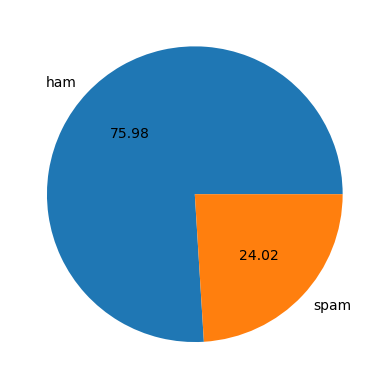

In [20]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(), labels = ['ham', 'spam'], autopct= "%.02f")
plt.show()

In [21]:
# data is imbalanced 

In [22]:
import nltk
!pip install nltk

In [23]:
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\JAGADISH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [24]:
df['num_char'] = df['text'].apply(len)

C:\Users\JAGADISH\AppData\Local\Temp\ipykernel_9492\3778023891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char'] = df['text'].apply(len)


In [25]:
df

,text,target,num_char
0,naturally irresistible your corporate identity...,1,1475
1,the stock trading gunslinger fanny is merrill...,1,588
2,unbelievable new homes made easy im wanting t...,1,439
3,4 color printing special request additional i...,1,490
4,"do not have money , get software cds from here...",1,226
...,...,...,...
5723,re : research and development charges to gpg ...,0,1180
5724,"re : receipts from visit jim , thanks again ...",0,1157
5725,re : enron case study update wow ! all on the...,0,2122
5726,"re : interest david , please , call shirley ...",0,1051


In [26]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\JAGADISH\AppData\Local\Temp\ipykernel_9492\2435226368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [27]:
df['num_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\JAGADISH\AppData\Local\Temp\ipykernel_9492\4067167258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [28]:
df

,text,target,num_char,num_words,num_sent
0,naturally irresistible your corporate identity...,1,1475,323,11
1,the stock trading gunslinger fanny is merrill...,1,588,88,1
2,unbelievable new homes made easy im wanting t...,1,439,86,4
3,4 color printing special request additional i...,1,490,97,5
4,"do not have money , get software cds from here...",1,226,51,9
...,...,...,...,...,...
5723,re : research and development charges to gpg ...,0,1180,296,7
5724,"re : receipts from visit jim , thanks again ...",0,1157,243,28
5725,re : enron case study update wow ! all on the...,0,2122,514,30
5726,"re : interest david , please , call shirley ...",0,1051,275,6


In [29]:
df[["num_char", "num_words", "num_sent"]].describe()

,num_char,num_words,num_sent
count,5695.000000,5695.000000,5695.000000
mean,1548.954697,326.214047,19.462511
std,2047.072261,419.654234,35.981993
min,3.000000,1.000000,1.000000
25%,499.000000,100.000000,7.000000
50%,970.000000,209.000000,12.000000
75%,1883.500000,401.000000,22.000000
max,43943.000000,8477.000000,1565.000000


In [30]:
df[df['target'] == 0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4327.000000,4327.000000,4327.000000
mean,1625.172406,345.283799,19.838225
std,1965.010626,407.227757,38.124564
min,3.000000,1.000000,1.000000
25%,568.500000,118.000000,7.000000
50%,1113.000000,238.000000,13.000000
75%,2028.500000,438.500000,22.000000
max,43943.000000,8477.000000,1565.000000


In [31]:
df[df['target'] == 1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,1368.000000,1368.000000,1368.000000
mean,1307.877193,265.896199,18.274123
std,2271.327029,451.623124,28.130434
min,8.000000,3.000000,1.000000
25%,392.500000,78.000000,6.000000
50%,684.000000,139.000000,11.000000
75%,1240.500000,250.000000,18.000000
max,28422.000000,6129.000000,438.000000


In [32]:
import seaborn as sns

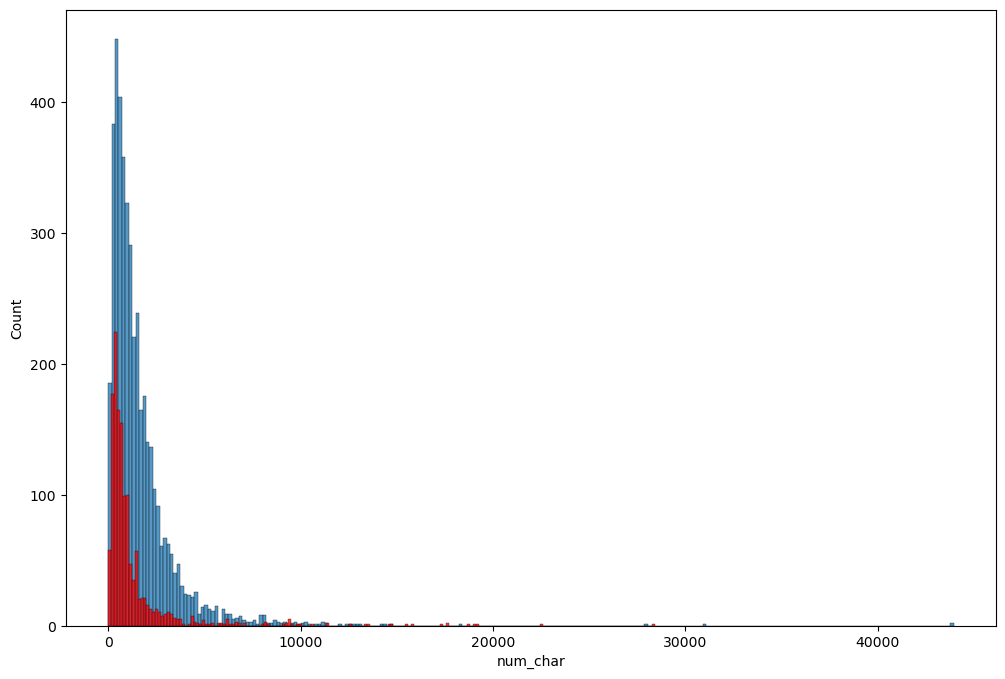

In [33]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'],color='red')
plt.show()

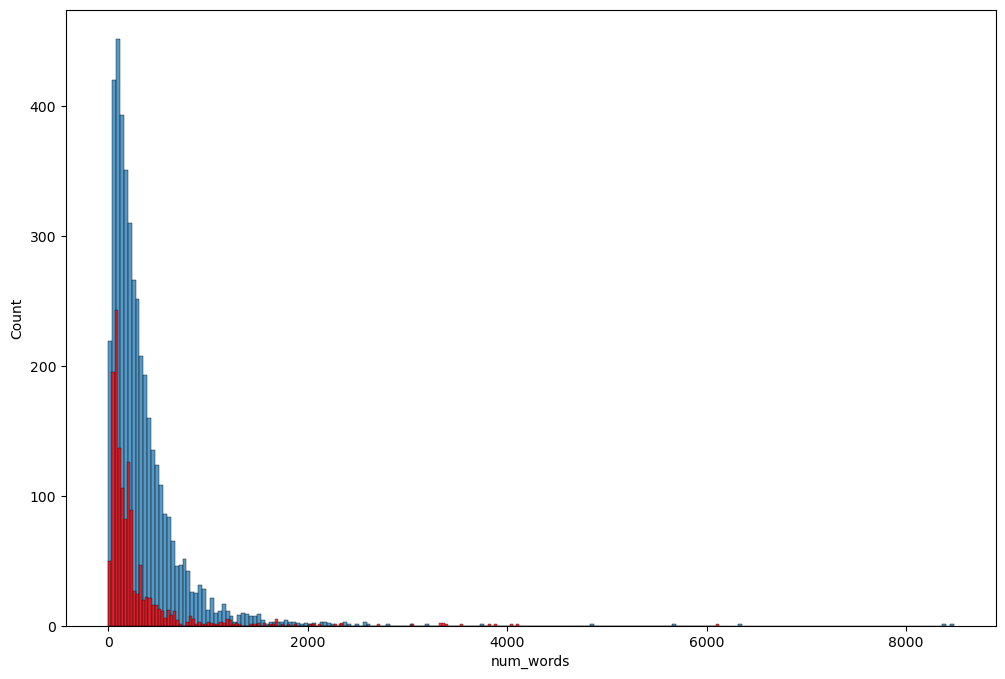

In [34]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')
plt.show()

<Axes: >

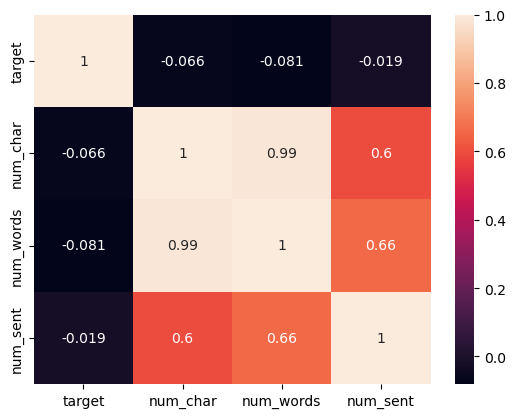

In [35]:
sns.heatmap(df.corr(numeric_only=True), annot = True)

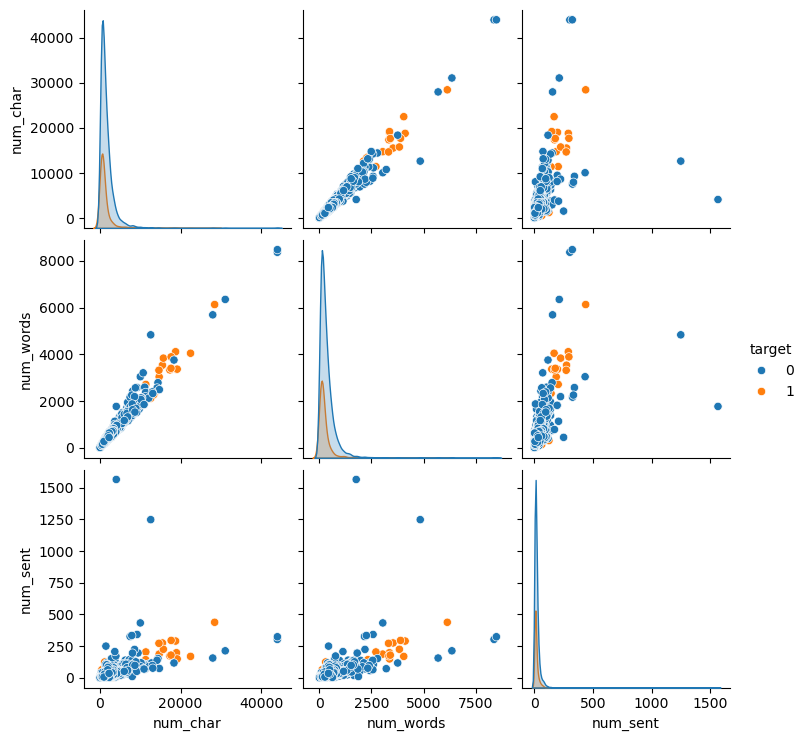

In [36]:
sns.pairplot(df, hue='target')

## 3. data preprocessing
 *lower case,
 Tokenization,
 Removing special charanters,
 Removing stop words and punctuation,
 stemming,

In [37]:
from  nltk.corpus import stopwords
import string

In [38]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)
    

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("loving")

'love'

In [40]:
transform_text("Subject: re : doctor approved pill lgw  a man endowed with a 7 - 8  hammer is simply  better equipped than a man with a 5 - 6  hammer .  would you rather havemore than enough to get the job done or fall short . it \' s totally upto you . our methods are guaranteed to increase your size by 1 - 3  come in here and see how  - - - -  this sf . net email is sponsored by : thinkgeek  welcome to geek heaven .  http : / / thinkgeek . com / sf  spamassassin - sightings mailing list")

'subject doctor approv pill lgw man endow 7 8 hammer simpli better equip man 5 6 hammer would rather havemor enough get job done fall short total upto method guarante increas size 1 3 come see sf net email sponsor thinkgeek welcom geek heaven http thinkgeek com sf spamassassin sight mail list'

In [41]:
df['text'][100]

're : doctor approved pill lgw  a man endowed with a 7 - 8 " hammer is simply  better equipped than a man with a 5 - 6 " hammer .  would you rather havemore than enough to get the job done or fall short . it \' s totally upto you . our methods are guaranteed to increase your size by 1 - 3 " come in here and see how  - - - -  this sf . net email is sponsored by : thinkgeek  welcome to geek heaven .  http : / / thinkgeek . com / sf  spamassassin - sightings mailing list'

In [42]:
df.sample(5)

,text,target,num_char,num_words,num_sent
3835,"re : resume vasant , i agree . vince from ...",0,3653,901,39
2624,"re : li sun jeff , i met with li sun last ni...",0,892,196,11
466,use this handy interest calculator to get curr...,1,580,113,8
4214,"re : backtesting naveen , most of these test...",0,818,156,8
1392,re : a / a program question gwyn : just beca...,0,3229,750,25


In [46]:
from tqdm import tqdm
tqdm.pandas()

df["transformed_text"] = df['text'].progress_apply(transform_text)

100%|██████████| 5695/5695 [14:15<00:00,  6.66it/s]  
C:\Users\JAGADISH\AppData\Local\Temp\ipykernel_9492\3247310304.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_text"] = df['text'].progress_apply(transform_text)


In [43]:
!pip install wordcloud

In [44]:
# highlit imp words

from wordcloud import WordCloud
wc = WordCloud(width=400, height= 400, min_font_size= 10, background_color= 'white')

In [47]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

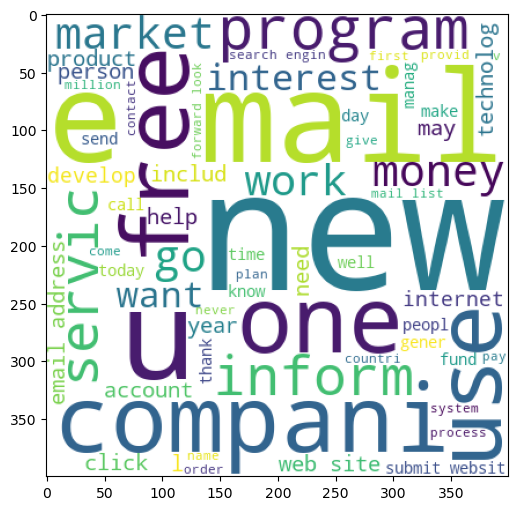

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()

In [49]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))

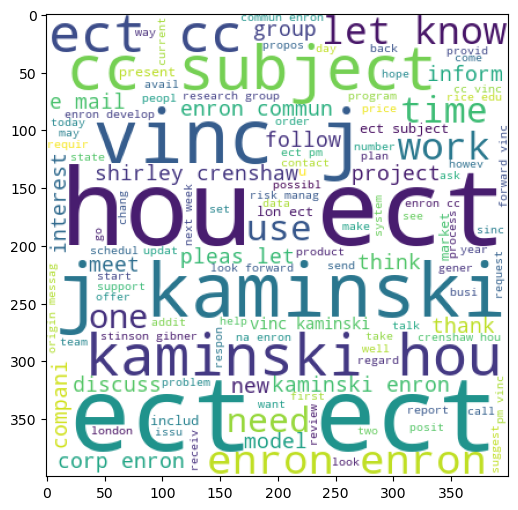

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.show()

In [51]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [52]:
len(spam_corpus)

173262

C:\Users\JAGADISH\AppData\Local\Temp\ipykernel_9492\4042569013.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],  palette= 'Set2')


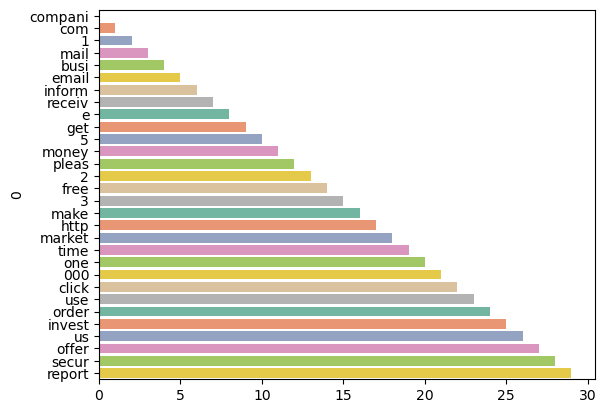

In [53]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],  palette= 'Set2')
plt.xticks()
plt.show()

In [54]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [55]:
len(ham_corpus)

698664

C:\Users\JAGADISH\AppData\Local\Temp\ipykernel_9492\3288431292.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],palette= 'Set2')


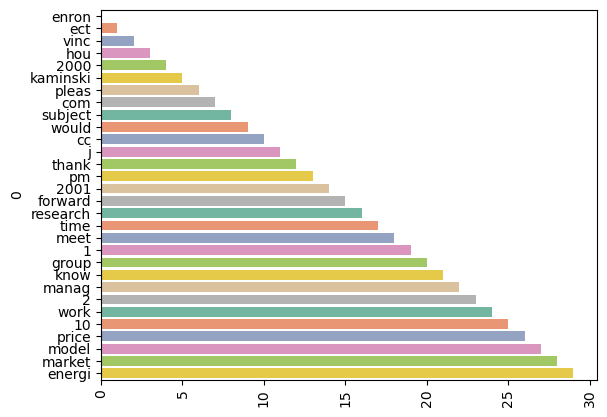

In [56]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],palette= 'Set2')
plt.xticks(rotation='vertical')
plt.show()

In [57]:
df.head()

,text,target,num_char,num_words,num_sent,transformed_text
0,naturally irresistible your corporate identity...,1,1475,323,11,natur irresist corpor ident lt realli hard rec...
1,the stock trading gunslinger fanny is merrill...,1,588,88,1,stock trade gunsling fanni merril muzo colza a...
2,unbelievable new homes made easy im wanting t...,1,439,86,4,unbeliev new home made easi im want show homeo...
3,4 color printing special request additional i...,1,490,97,5,4 color print special request addit inform cli...
4,"do not have money , get software cds from here...",1,226,51,9,money get softwar cd softwar compat great grow...


In [58]:
df['new_no.of_char'] = df['transformed_text'].apply(len)

C:\Users\JAGADISH\AppData\Local\Temp\ipykernel_9492\3015258867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_no.of_char'] = df['transformed_text'].apply(len)


In [59]:
 df

,text,target,num_char,num_words,num_sent,transformed_text,new_no.of_char
0,naturally irresistible your corporate identity...,1,1475,323,11,natur irresist corpor ident lt realli hard rec...,764
1,the stock trading gunslinger fanny is merrill...,1,588,88,1,stock trade gunsling fanni merril muzo colza a...,452
2,unbelievable new homes made easy im wanting t...,1,439,86,4,unbeliev new home made easi im want show homeo...,246
3,4 color printing special request additional i...,1,490,97,5,4 color print special request addit inform cli...,324
4,"do not have money , get software cds from here...",1,226,51,9,money get softwar cd softwar compat great grow...,106
...,...,...,...,...,...,...,...
5723,re : research and development charges to gpg ...,0,1180,296,7,research develop charg gpg forward shirley cre...,706
5724,"re : receipts from visit jim , thanks again ...",0,1157,243,28,receipt visit jim thank invit visit lsu shirle...,762
5725,re : enron case study update wow ! all on the...,0,2122,514,30,enron case studi updat wow day super thank muc...,1201
5726,"re : interest david , please , call shirley ...",0,1051,275,6,interest david pleas call shirley crenshaw ass...,611


# Model Building


In [60]:
# Text Vectorization
# using Bag of Words or TF-iV

In [61]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [62]:
X =  cv.fit_transform(df['transformed_text']).toarray()

In [63]:
'''from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X = scalar.fit_transform(X)'''

'from sklearn.preprocessing import MinMaxScaler\nscalar = MinMaxScaler()\nX = scalar.fit_transform(X)'

In [64]:
X.shape

(5695, 29220)

In [65]:
y = df['target'].values

In [66]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [69]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [70]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [71]:
gnb.fit(X_train, y_train)   # for GaussianNB
y_pred1 = gnb.predict(X_test) # 
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9569798068481123
[[830  13]
 [ 36 260]]
0.9523809523809523


In [72]:
mnb.fit(X_train, y_train)   # MultinomialNB
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9894644424934153
[[834   9]
 [  3 293]]
0.9701986754966887


In [73]:
bnb.fit(X_train , y_train)   # BernoulliNB
y_pred3 = bnb.predict(X_test )
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9806848112379281
[[834   9]
 [ 13 283]]
0.9691780821917808


In [74]:
# cv --> mnb

In [75]:
#!pip install xgboost

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier
)
from xgboost import XGBClassifier


In [77]:
'''svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)'''

"svc = SVC(kernel='sigmoid', gamma=1.0)\nknc = KNeighborsClassifier()\nmnb = MultinomialNB()\ndtc = DecisionTreeClassifier(max_depth=5)\nlrc = LogisticRegression(solver='liblinear', penalty='l1')\nrfc = RandomForestClassifier(n_estimators=50, random_state=2)\nabc = AdaBoostClassifier(n_estimators=50, random_state=2)\nbc = BaggingClassifier(n_estimators=50, random_state=2)\netc = ExtraTreesClassifier(n_estimators=50, random_state=2)\ngbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)\nxgb = XGBClassifier(n_estimators=50,random_state=2)"

In [78]:
'''clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}'''

"clfs = {\n    'SVC' : svc,\n    'KN' : knc, \n    'NB': mnb, \n    'DT': dtc, \n    'LR': lrc, \n    'RF': rfc, \n    'AdaBoost': abc, \n    'BgC': bc, \n    'ETC': etc,\n    'GBDT':gbdt,\n    'xgb':xgb\n}"

In [79]:
'''def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision'''

'def train_classifier(clf,X_train,y_train,X_test,y_test):\n    clf.fit(X_train,y_train)\n    y_pred = clf.predict(X_test)\n    accuracy = accuracy_score(y_test,y_pred)\n    precision = precision_score(y_test,y_pred)\n    \n    return accuracy,precision'

In [80]:
'''train_classifier(svc,X_train,y_train,X_test,y_test)'''

'train_classifier(svc,X_train,y_train,X_test,y_test)'

In [81]:
'''accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)'''

'accuracy_scores = []\nprecision_scores = []\n\nfor name,clf in clfs.items():\n    \n    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)\n    \n    print("For ",name)\n    print("Accuracy - ",current_accuracy)\n    print("Precision - ",current_precision)\n    \n    accuracy_scores.append(current_accuracy)\n    precision_scores.append(current_precision)'

In [82]:
#performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [83]:
#performance_df

In [86]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))